# 天文数据及用到的机器学习方法

## SDSS Data

astroML提供的大部分数据来自于新墨西哥州Apache Point天文台进行的十年以上的斯隆数字巡天（SDSS）光度和光谱测量。 这次调查为数以亿计的恒星，类星体和星系提供了光度测量，并为数百万个这样的物体提供了光谱。 此外，调查的第二阶段在天空的一小部分上进行重复成像，称为条纹82，从而研究许多物体的时间变化。

通过五个滤波器u，g，r，i和z观测SDSS光度数据。 这些过滤器的范围的可视化如下所示：

downnloading from http://www.astro.washington.edu/users/ivezic/DMbook/data/1732526_nic_002.ascii
downloading from http://www.sdss.org/dr7/instruments/imager/filters/u.dat
downloading from http://www.sdss.org/dr7/instruments/imager/filters/g.dat
downloading from http://www.sdss.org/dr7/instruments/imager/filters/r.dat
downloading from http://www.sdss.org/dr7/instruments/imager/filters/i.dat
downloading from http://www.sdss.org/dr7/instruments/imager/filters/z.dat


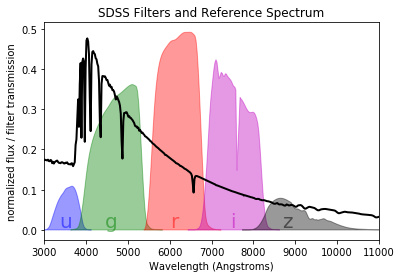

In [1]:
%run plot_sdss_filters.py

### SDSS光谱

SDSS光谱数据作为单独的FITS文件提供，由三个数字索引： plate, MJD, and fiber 号码。 fetch_sdss_spectrum（）获取一个plate, MJD, and fiber，并将光谱下载到磁盘。 光谱数据可以如下显示：

这个例子展示了如何使用plate, MJD, and fiber从SDSS数据库中提取和绘制一个光谱。 下面的代码向SDSS服务器发送一个查询plate, MJD, and fiber，下载频谱并绘制结果。

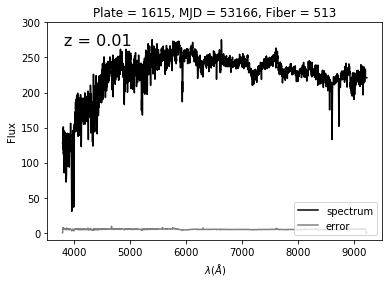

In [2]:
%run plot_sdss_spectrum.py

### SDSS 光度

可以使用SDSS目录归档服务器（CAS）的SQL接口直接访问光度数据。 astroML包含一个使用Python SQL查询工具直接访问这些数据的函数。 该函数被称为fetch_sdss_galaxy_colors（），可以用作使用简单的Python命令创建自定义数据集的模板。 其中一些结果如下图所示：

下面使用的函数fetch_sdss_galaxy_colors（）实际上是查询SDSS CASjobs服务器的50,000个星系的颜色。 下面我们提取5000个星星的颜色和散点图结果

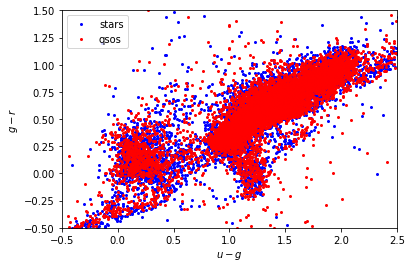

In [10]:
%run plot_sdss_galaxy_colors.py

### SDSS校正光谱

SDSS光谱来自红移范围内的星系，由于天空吸收，宇宙射线，不良探测器像素或其他影响，具有不可靠或缺失数据的部分。 AstroML提供了一组已经移动到静止帧的频谱，使用迭代PCA重建技术
[参见下载和处理SDSS频谱的示例](http://www.astroml.org/examples/datasets/compute_sdss_pca.html#example-datasets-compute-sdss-pca)对其进行屏蔽校正，并重新采样到1000个常用波长分档。 光谱可以使用fetch_sdss_corrected_spectra（）来下载。 下面显示了一些这样的例子：

In [12]:
%run plot_corrected_spectra.py;

ERROR:root:File `'plot_corrected_spectra.py;.py'` not found.


In [21]:
%run compute_sdss_pca.py;

ERROR:root:File `'compute_sdss_pca.py;.py'` not found.


这些数据用于第7章的几个示例图：维度及其缩减。
由于这些谱图是为了实现高维分类和可视化程序，因此为这些对象提供一些额外的分类数据很有用。 数据集中的一组功能是线路比率测量。 这些可以被显示如下所示：

In [23]:
%run plot_sdss_line_ratios.py;

ERROR:root:File `'plot_sdss_line_ratios.py;.py'` not found.


### SDSS光谱样品

与光谱一起，SDSS对调查区域内的物体进行光度观测记录。 那些既有光谱又有光度测量的物体提供了关于夜空中许多类物体的大量信息。 SDSS光谱星系样品的光度测定可以通过fetch_sdss_specgals（）函数获得，其中一些属性如下图所示：

该图显示了SDSS光谱星系样品的光度色。

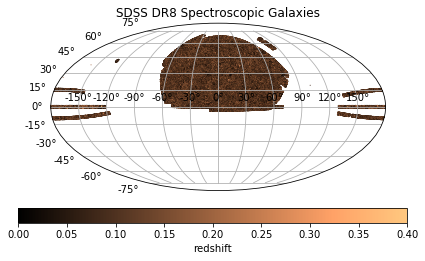

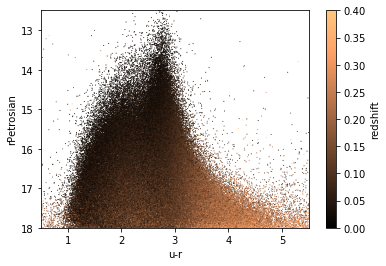

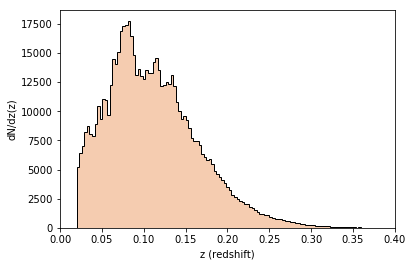

In [25]:
%run plot_sdss_specgals.py

SDSS光谱样品的一个众所周知的特征是“great wall”，一个位于几百兆帕斯卡之外的星系丝。great wall数据属于光谱样本：为了能够轻松使用它，astroML包含函数fetch_great_wall（）。 数据如下：

绘制SDSS“great wall”，SDSS光谱星系样本的投影位置中可见的星系的细丝。 

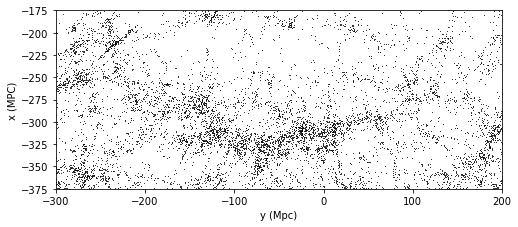

In [26]:
%run plot_great_wall.py

### SDSS DR7类星体目录

SDSS已经获得了超过100,000个遥远的类星体的光谱。 类星体描述在[SDSS网站](http://classic.sdss.org/dr7/products/value_added/qsocat_dr7.html)上，可以使用函数fetch_dr7_quasar（）来下载。 下面的图表中使用了一些类星体数据：

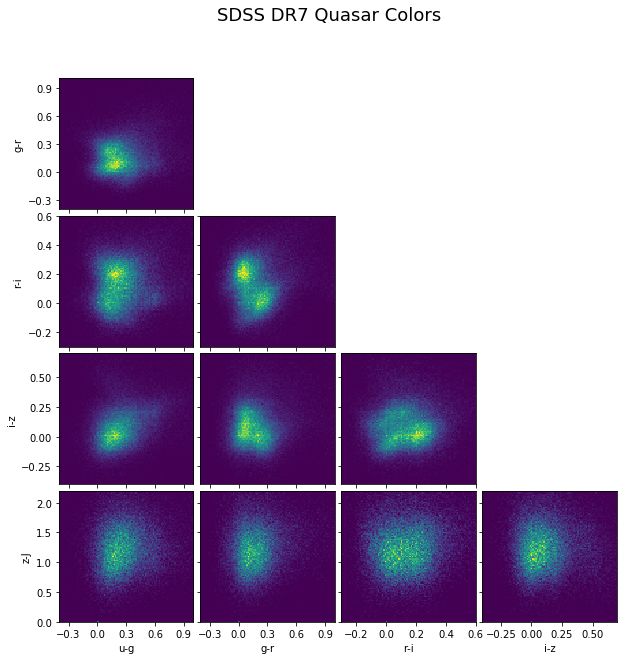

In [27]:
%run plot_dr7_quasar.py

### SDSS成像样品

虽然SDSS中的分光观测对象为每个物体提供了大量的测量特征，但是每个类（星系，恒星，类星体）的观测对象总数都在100万以下。 完整的光度测量样本要深得多，因此包含数以亿计物体的光度测量。 astroML有一个名为fetch_imaging_sample（）的函数，它加载了这个数据的选择。 一些返回的属性可视化如下：

这个例子展示了如何加载SDSS成像目录中的星等数据，并绘制恒星和星系的颜色和大小。

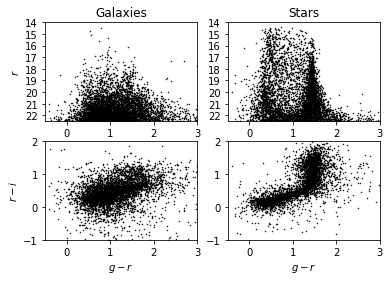

In [28]:
%run plot_sdss_imaging.py

### SDSS Segue恒星参数管道

有几个小组制作了各种增值目录，其中包含了SDSS数据库中对象的其他观测特征。 Segue恒星参数流水线（Segue Stellar Parameters Pipeline，SSPP）就是一个例子，它可以从SDSS测光和光谱中获得大量的附加对象特征。 这些数据可以使用函数fetch_sdss_sspp（）来下载。 一些金属性和温度数据如下图所示：

这个例子展示了如何创建Segue恒星参数流水线（SSPP）数据的Hess图表，以在一个图上显示多个特征。 左侧面板显示图上点的密度。 右侧面板显示每个像素的平均金属性，等高线反映了左图所示的密度。

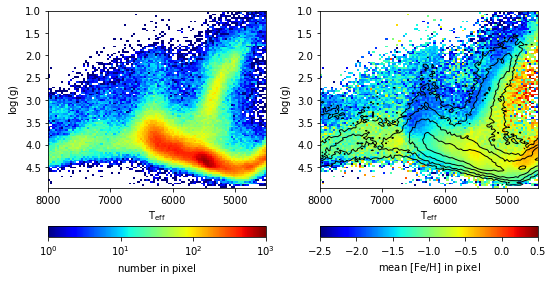

In [29]:
%run plot_SDSS_SSPP.py

左图显示温度/log（g）点的密度。 这些参数与基于光度色的熟悉的HR图相关。 右图显示每个像素的平均金属性，等高线表示点的密度。 SSPP数据集中还有更多的属性可用;

### 条纹82：时域

在SDSS的第二阶段，该项目反复调查了一小部分被称为Stripe 82的天空。这在时间域内产生了一组前所未有的数据，这使得人们对小行星的轨道， 某些类别的恒星的可变性以及宇宙膨胀的加速。

astroML包含两个基于Stripe 82数据的数据集：一个包含RR-Lyrae恒星的观测值，另一个包含太阳系内运动物体（即小行星）的观测值。

RR-Lyrae数据可以使用fetch_rrlyrae_mags（）函数获得，并导致数据集可视化如下：

这个例子下载和绘制RR Lyrae恒星的颜色以及非变星的颜色。 书中的几个分类示例使用这个数据集。

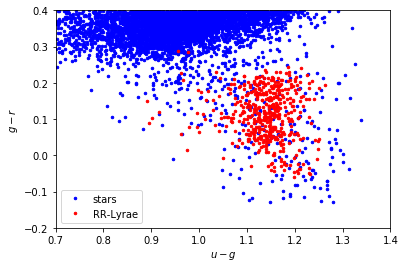

In [30]:
%run plot_rrlyrae_mags.py

移动物体可以使用fetch_moving_objects（）函数获得，给出的数据集不仅包含光度观测值，还包含轨道参数。 这些信息的一部分进入了下面的可视化：

该图演示了如何从SDSS移动对象目录中获取数据

downloading moving object catalog from http://www.astro.washington.edu/users/ivezic/sdssmoc/ADR3.dat.gz to C:\Users\htfeng\astroML_data
[=========================================]  25.33Mb / 25.33Mb   
uncompressing file...


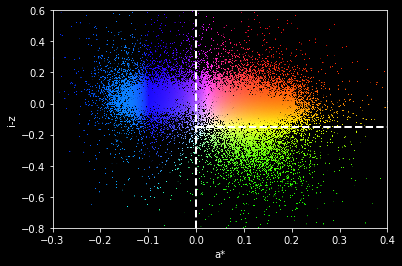

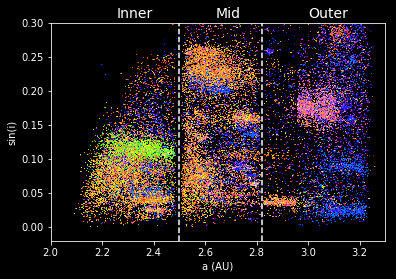

In [31]:
%run plot_moving_objects.py

### 条纹82：标准星

与时域数据一起，条纹82中的重复观测使堆叠的光源测光成为可能，以最小化其测量通量中的统计误差。 条纹82标准恒星是该地区的一组恒星，低于规定的变异性标准。 将多次曝光结合起来，可以得到高度精确的恒星目录。 这个数据可以使用fetch_sdss_S82standards（）函数获得。 本目录中的部分数据如下图所示：

这演示了如何获取和绘制SDSS Stripe 82标准恒星的颜色，无论是单独的还是交叉匹配的2MASS颜色。

downloading cross-matched SDSS/2MASS dataset from http://www.astro.washington.edu/users/ivezic/sdss/catalogs/stripe82calibStars_2MASS_v2.6.dat.gz to C:\Users\htfeng\astroML_data
[=========================================]  25.57Mb / 25.57Mb   
uncompressing file...


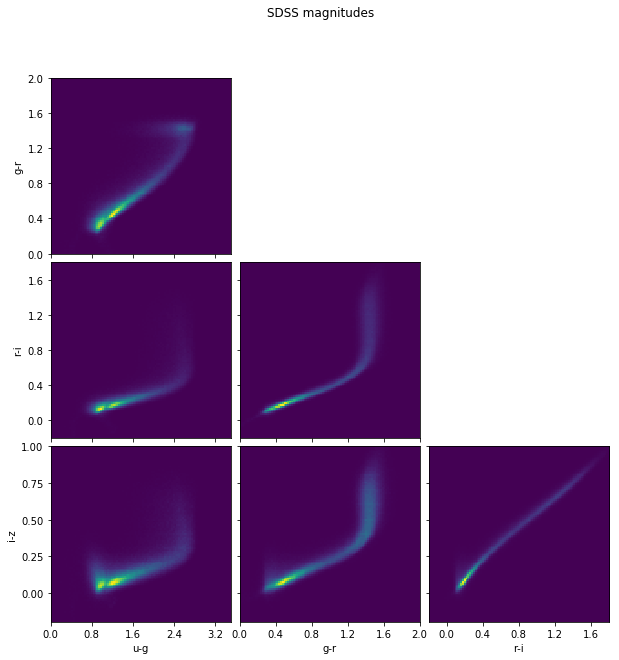

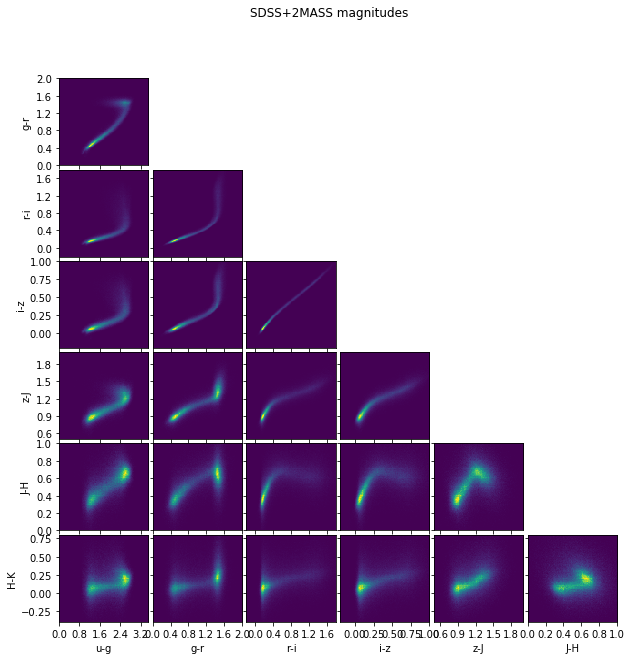

In [32]:
%run plot_sdss_S82standards.py

## 时域数据



### RR Lyrae模板

RR Lyrae光线曲线模板在分析时间序列数据时非常有用。 函数fetch_rrlyrae_templates（）获取使用的模板。 以下是使用傅里叶级数重构其中一个模板的教科书：

RR Lyrae光曲线的截断傅立叶表示的一个例子。 粗虚线表示真实的曲线; 灰线显示基于1,3和8傅立叶模式（正弦曲线）的近似值。

In [34]:
%run fig_rrlyrae_reconstruct.py;

ERROR:root:File `'fig_rrlyrae_reconstruct.py;.py'` not found.


### 线性光曲线

林肯近地小行星研究（LINEAR）项目自1998年以来一直存在，目的是发现和追踪近地小行星。 它的档案包含了数百万的天空图像，灵敏度和天空覆盖的组合使其成为研究包括变星在内的时域天文学的宝贵资源。 astroML有两个与LINEAR示例相关的函数：fetch_LINEAR_sample（）获取超过7000个变星的光线曲线。 fetch_LINEAR_geneva（）包含大部分这些校准周期。 在下图中可以看到6个LINEAR对象的阶段性光线曲线。 在这里，这些时期是用Lomb-Scargle周期图找到的。

LINEAR数据集中的六个周期性对象的阶段性光线曲线。 这些线条使用傅立叶扩展的前四项（等式10.68）显示了对相位光曲线的最佳拟合，并且使用Lomb-Scargle周期图选择了omega_0。

@pickle_results: computing results and saving to 'LINEAR_LS.pkl'
 - computing power for 14752041 (253 points)
 - computing power for 1009459 (593 points)
 - computing power for 10022663 (246 points)
 - computing power for 10025796 (233 points)
 - computing power for 11375941 (280 points)
 - computing power for 18525697 (211 points)
 - omega_0 = 17.21695506
 - omega_0 = 51.10600808
 - omega_0 = 10.20062676
 - omega_0 = 45.55493503
 - omega_0 = 58.44512277
 - omega_0 = 10.82722772


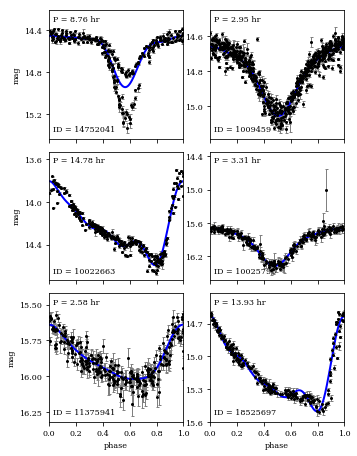

In [38]:
%run fig_LINEAR_LS.py

### LIGO数据

激光干涉仪Gravitaional-Wave Observatory（LIGO）是利用激光干涉测量来测量空间的膨胀和收缩，这些空间的预测是由地球引力波引起的。 这是一个具有非常复杂的噪声频率结构的有规律采样时间序列的例子：必须高度理解这个结构。 astroML包含两个LIGO相关数据集的加载器。 fetch_LIGO_large（）获取大量LIGO数据样本，这对于表征调查的背景噪声很有用。 fetch_LIGO_bigdog（）包含与大狗事件相关的数据，这是一个盲注测试，旨在测量仪器和调查小组对潜在信号的响应。 下图显示了使用汉宁滤波器从LIGO数据中获取噪声频谱的示例：

这比较了使用原始FFT计算的功率谱，并使用韦尔奇（Welch）方法（即，减少噪声的重叠窗口函数）。 顶部面板显示原始信号，即基线长度变化的测量结果。 底部面板显示了原始和平滑的功率谱，由LIGO团队用来表征检测器的噪声。 

downloading LIGO bigdog data from http://www.astro.washington.edu/users/ivezic/DMbook/LIGO/hoft.968653908-968655956.H1.dat.gz to C:\Users\htfeng\astroML_data\LIGO_large.npy
[=========================================]  86.53Mb / 86.53Mb   
uncompressing file...


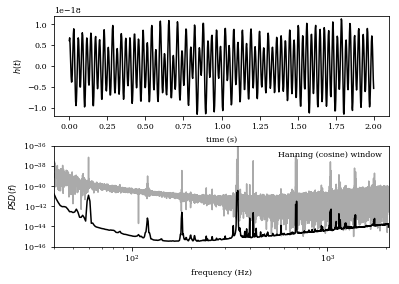

In [39]:
%run plot_LIGO_spectrum.py

### WMAP温度图

WMAP项目利用卫星观测了宇宙微波背景波动的细节，在过去的十年中，宇宙基本常数受到了前所未有的和不断改善的限制。 astroML包含WMAP数据的加载器，使用例程fetch_wmap_temperatures（）。 使用healpy包，我们可以看到原始的WMAP数据：

这演示了如何使用Healpy（healpix的python包装器）绘制和获取WMAP数据的功率谱。 Healpy可在[github网站](https://github.com/healpy/healpy)下载

In [47]:
%run plot_wmap_power_spectra.py;

ERROR:root:File `'plot_wmap_power_spectra.py;.py'` not found.


healpy也有计算快速球谐函数变换的一些例程。 严格的治疗包括纠正在右侧图像中看到的掩模图案。 忽略这种修正，可以使用healpy中的工具进行简单的功率谱分析：